<a href="https://colab.research.google.com/github/randy-tsukemen/Data_science_roadmap/blob/master/Customer_Analytics_and_A_B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Key Performance Indicators: Measuring Business Success

What is A/B testing?
- A/B Testing: Test different ideas against each other in the real world
- Choose the one that statistically performs better

Why is A/B testing important?
- No guessing
- Provides accurate answers - quickly
- Allows to rapidly iterate on ideas
- establish causal relationships

A/B test process
1. Develop a hypothesis about your product or
business
2. Randomly assign users to two different groups
3. Expose:
  - Group 1 to the the current product rules
  - Group 2 to a product that tests the
hypothesis
4. Pick whichever performs better according to a
set of KPIs

Where can A/B testing be used?

Users + ideas → A/B test
- testing impact of drugs
- incentivizing spending
- driving user growth
- many more!

Course progression
1. Understanding users — Key Performance Indicators
2. Identifying trends — Exploratory Data Analysis
3. Optimizing performance — Design of A/B Tests
4. Data driven decisions — Analyzing A/B Test Results

Key performance indicators (KPIs)
- A/B Tests: Measure impact of changes on KPIs
- KPIs — metrics important to an organization
 - likelihood of a side-effect
  - revenue
  - conversion rate

How to identify KPIs

Experience + Domain knowledge + Exploratory data analysis
- Experience & Knowledge - What is important to a business
- Exploratory Analysis - What metrics and relationships impact these KPIs

Next Up...
- Exploratory Data Analysis (EDA)
- Identify KPIs and areas for further analysis

which of the following do you think is the key component of an A/B test's usefulness?

Having the users be randomly assigned to groups.

which of the following do you think is the key component of an A/B test's usefulness?



Example: meditation app
- Services
  - Paid subscription
  - In-app purchases
- Goals/KPIs
  - Maintain high free → paid conversion rate

Dataset 1: User demographics

Dataset 2: User actions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# load customer_data
customer_data = pd.read_csv('https://assets.datacamp.com/production/repositories/1646/datasets/c3a701a4729471ae0b92d8c300b470fd2ec0a73a/user_demographics_v1.csv')
# print the head of customer_data
print(customer_data.head())

          uid              reg_date device gender country  age
0  54030035.0  2017-06-29T00:00:00Z    and      M     USA   19
1  72574201.0  2018-03-05T00:00:00Z    iOS      F     TUR   22
2  64187558.0  2016-02-07T00:00:00Z    iOS      M     USA   16
3  92513925.0  2017-05-25T00:00:00Z    and      M     BRA   41
4  99231338.0  2017-03-26T00:00:00Z    iOS      M     FRA   59


In [3]:
# load app_purchases
app_purchases = pd.read_csv('https://assets.datacamp.com/production/repositories/1646/datasets/5decd183ef3710475958bbc903160fd6354379d5/purchase_data_v1.csv')
# print the head of app_purchases
print(app_purchases.head())

         date       uid            sku  price
0  2017-07-10  41195147  sku_three_499    499
1  2017-07-15  41195147  sku_three_499    499
2  2017-11-12  41195147   sku_four_599    599
3  2017-09-26  91591874    sku_two_299    299
4  2017-12-01  91591874   sku_four_599    599


Merging on different sets of fields

In [4]:
# Merge on the 'uid' field
uid_combined_data = app_purchases.merge(customer_data, on=['uid'], how='inner')

# Examine the results 
print(uid_combined_data.head())
print(len(uid_combined_data))

         date       uid            sku  price  ... device gender country age
0  2017-07-10  41195147  sku_three_499    499  ...    and      M     BRA  17
1  2017-07-15  41195147  sku_three_499    499  ...    and      M     BRA  17
2  2017-11-12  41195147   sku_four_599    599  ...    and      M     BRA  17
3  2017-09-26  91591874    sku_two_299    299  ...    and      M     TUR  17
4  2017-12-01  91591874   sku_four_599    599  ...    and      M     TUR  17

[5 rows x 9 columns]
9006


In [5]:
uid_combined_data.columns

Index(['date', 'uid', 'sku', 'price', 'reg_date', 'device', 'gender',
       'country', 'age'],
      dtype='object')

In [6]:
['Unnamed: 0', 'date', 'uid', 'sku', 'price', 'reg_date', 'device', 'gender', 'country', 'age', 'first_week_purchases']

['Unnamed: 0',
 'date',
 'uid',
 'sku',
 'price',
 'reg_date',
 'device',
 'gender',
 'country',
 'age',
 'first_week_purchases']

In [7]:
customer_data['date'] = customer_data.reg_date.str[:10]

In [8]:
# Merge on the 'uid' and 'date' field
uid_date_combined_data = app_purchases.merge(customer_data, on=['uid', 'date'], how='inner')

# Examine the results 
print(uid_date_combined_data.head())
print(len(uid_date_combined_data))

         date       uid             sku  price  ... device gender country age
0  2016-03-30  94055095    sku_four_599    599  ...    iOS      F     BRA  16
1  2015-10-28  69627745     sku_one_199    199  ...    and      F     BRA  18
2  2017-02-02  11604973  sku_seven_1499    499  ...    and      F     USA  16
3  2016-06-05  22495315    sku_four_599    599  ...    and      F     USA  19
4  2018-02-17  51365662     sku_two_299    299  ...    iOS      M     TUR  16

[5 rows x 9 columns]
35


KPI: Conversion Rate
- Conversion Rate: Percentage of users who
subscribe after the free trial
  - Of users who convert within one week? One
month?...
  - Across all users or just a subset?

Choosing a KPI
- Stability over time
- Importance across different user groups
- Correlation with other business factors

KPIs
- Reminder: conversion rate is just one KPI
- Most companies will have many KPIs
- Each serves a different purpose

Practicing aggregations

Notice how the mean is higher than the median? This suggests that we have some users who are making a lot of purchases!

In [9]:
purchase_data = uid_combined_data
# Calculate the mean and median of price and age
purchase_summary = purchase_data.agg({'price': ['mean', 'median'], 'age': ['mean', 'median']})

# Examine the output 
print(purchase_summary)

             price        age
mean    406.772596  23.922274
median  299.000000  21.000000


Grouping & aggregating

These values provide a great summary of the customer data which will be useful as you move to optimizing the conversion rate.

In [10]:
# Group the data 
grouped_purchase_data = purchase_data.groupby(by = ['device', 'gender'])

# Aggregate the data
purchase_summary = grouped_purchase_data.agg({'price': ['mean', 'median', 'std']})

# Examine the results
print(purchase_summary)

                    price                   
                     mean median         std
device gender                               
and    F       400.747504    299  179.984378
       M       416.237308    499  195.001520
iOS    F       404.435330    299  181.524952
       M       405.272401    299  196.843197


Goal - comparing our KPIs
- Goal: Examine the KPI "user conversion rate"
after the free trial
- Week One Conversion Rate: Limit to users
who convert in their ?rst week after the trial ends

How to choose KPI metrics?
- Infinitely many potential KPIs
- How long does it take to determine
  - Monthly Conversion Rate = 1 Month Wait time
- Leverage Exploratory Data Analysis
  - Reveals relationships between metrics and key results
- Keep In Mind How do these KPIs and my Business goals relate

Why is conversion rate important?
- Strong measure of growth
- Potential early warning sign of problems
  - Sensitive to changes in the overall ecosystem

Continue exploring conversion rates
- How does this KPI evolve over time?
- See how changes can impact different groups differently

Calculating KPIs

Since our average price is 414 cents which is below $4.99 it seems that our purchasers tend towards the lower priced set of options.

In [11]:
# Compute max_purchase_date
current_date = pd.Timestamp('2018-03-17 00:00:00', tz='UTC')
max_purchase_date = current_date - pd.Timedelta(days=28)

purchase_data['reg_date'] = pd.to_datetime(purchase_data.reg_date, utc=True)
purchase_data['date'] = pd.to_datetime(purchase_data.date, utc=True)
# Filter to only include users who registered before our max date
purchase_data_filt = purchase_data[purchase_data.reg_date < max_purchase_date]

# Filter to contain only purchases within the first 28 days of registration
purchase_data_filt = purchase_data_filt[(purchase_data_filt.date <= 
                        purchase_data_filt.reg_date + pd.Timedelta(days=28))]

# Output the mean price paid per purchase
print(purchase_data_filt.price.mean())

414.4237288135593


Average purchase price by cohort

This value seems relatively stable over the past 28 days.

In [12]:
# Set the max registration date to be one month before today
max_reg_date = current_date - pd.Timedelta(days=28)

# Find the month 1 values
month1 = np.where((purchase_data.reg_date < max_reg_date) &
                 (purchase_data.date < purchase_data.reg_date + pd.Timedelta(days=28)),
                  purchase_data.price, 
                  np.NaN)
                 
# Update the value in the DataFrame
purchase_data['month1'] = month1

# Group the data by gender and device 
purchase_data_upd = purchase_data.groupby(by=['gender', 'device'], as_index=False) 

# Aggregate the month1 and price data 
purchase_summary = purchase_data_upd.agg(
                        {'month1': ['mean', 'median'],
                        'price': ['mean', 'median']})

# Examine the results 
print(purchase_summary)

  gender device      month1              price       
                       mean median        mean median
0      F    and  388.204545  299.0  400.747504    299
1      F    iOS  432.587786  499.0  404.435330    299
2      M    and  413.705882  399.0  416.237308    499
3      M    iOS  433.313725  499.0  405.272401    299


# Exploring and Visualizing Customer Behavior


Exploratory Data Analysis
- Exploratory Data Analysis (EDA)
- Working with time series data
- Uncovering trends in KPIs over time

Example: Week Two Conversion Rate
- Week 2 Conversion Rate Users who subscribe in the second week after the free trial
- Users must have:
  - Completed the free trial
  - Not subscribed in the ?rst week
  - Had a full second week to subscribe or not

Parsing dates

In [13]:
# Provide the correct format for the date
date_data_one = ['Saturday January 27, 2017', 'Saturday December 2, 2017']
date_data_one = pd.to_datetime(date_data_one, format="%A %B %d, %Y")
print(date_data_one)

# Provide the correct format for the date
date_data_two = ['2017-01-01', '2016-05-03']
date_data_two = pd.to_datetime(date_data_two, format="%Y-%m-%d")
print(date_data_two)

# Provide the correct format for the date
date_data_three = ['08/17/1978', '01/07/1976']
date_data_three = pd.to_datetime(date_data_three, format="%m/%d/%Y")
print(date_data_three)

# Provide the correct format for the date
date_data_four = ['2016 March 01 01:56', '2016 January 4 02:16']
date_data_four = pd.to_datetime(date_data_four, format="%Y %B %d %H:%M")
print(date_data_four)

DatetimeIndex(['2017-01-27', '2017-12-02'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2017-01-01', '2016-05-03'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1978-08-17', '1976-01-07'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2016-03-01 01:56:00', '2016-01-04 02:16:00'], dtype='datetime64[ns]', freq=None)


Conversion rate over time
- Useful Ways to Explore Metrics
  - By user type
  - Over time

Trends in different cohorts
- See how changes interact with different groups
- Compare users of different genders
- Evaluate the impact of a change across regions
- See the impact for different devices

In [14]:
# The maximum date in our dataset
current_date = pd.Timestamp('2018-03-17 00:00:00', tz='UTC')


# Find the week 1 values
first_week_purchases = np.where(
                 (purchase_data.date < purchase_data.reg_date + pd.Timedelta(days=28)),
                  1, 
                  0)
                 
# Update the value in the DataFrame
purchase_data['first_week_purchases'] = first_week_purchases

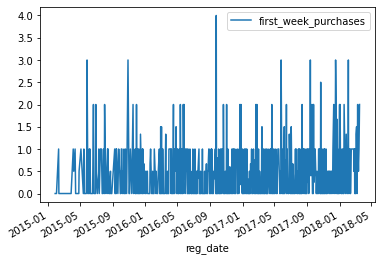

In [15]:
# Group the data and aggregate first_week_purchases
user_purchases = purchase_data.groupby(by=['reg_date', 'uid']).agg({'first_week_purchases': ['sum']})

# Reset the indexes
user_purchases.columns = user_purchases.columns.droplevel(level=1)
# user_purchases.reset_index(inplace=True)

# Find the average number of purchases per day by first-week users
user_purchases = user_purchases.groupby(by=['reg_date']).agg({'first_week_purchases': ['mean']})
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

# Plot the results
user_purchases.plot(x='reg_date', y='first_week_purchases')
plt.show()

Pivoting our data

There does seem to be an increase in the number of purchases by purchasing users within their first week. Let's now confirm that this is not driven only by one segment of users. 

In [16]:
# Pivot the data
country_pivot = pd.pivot_table(purchase_data, values='first_week_purchases', columns=['country'], index=['reg_date'])
print(country_pivot.head())

country                    BRA  CAN  DEU  FRA  TUR       USA
reg_date                                                    
2015-01-27 00:00:00+00:00  NaN  NaN  NaN  NaN  NaN  0.000000
2015-02-01 00:00:00+00:00  0.0  NaN  NaN  NaN  NaN       NaN
2015-02-09 00:00:00+00:00  NaN  NaN  NaN  NaN  NaN  0.083333
2015-02-10 00:00:00+00:00  NaN  NaN  NaN  NaN  NaN  0.000000
2015-03-01 00:00:00+00:00  NaN  NaN  NaN  NaN  NaN  0.000000


In [17]:
# Pivot the data
device_pivot = pd.pivot_table(purchase_data, values='first_week_purchases', columns=['device'], index=['reg_date'])
print(device_pivot.head())

device                          and  iOS
reg_date                                
2015-01-27 00:00:00+00:00       NaN  0.0
2015-02-01 00:00:00+00:00  0.000000  NaN
2015-02-09 00:00:00+00:00  0.083333  NaN
2015-02-10 00:00:00+00:00       NaN  0.0
2015-03-01 00:00:00+00:00       NaN  0.0


Examining the different cohorts

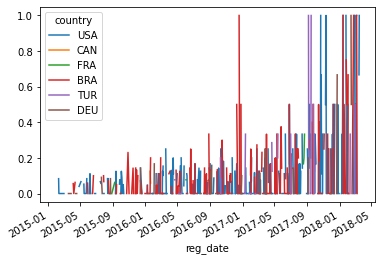

In [18]:
# Plot the average first week purchases for each country by registration date
country_pivot.reset_index().plot(x='reg_date', y=['USA', 'CAN', 'FRA', 'BRA', 'TUR', 'DEU'])
plt.show()

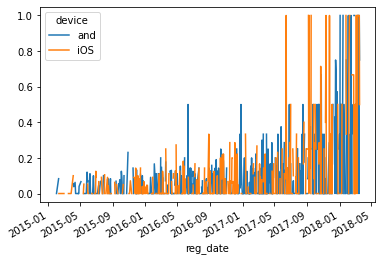

In [19]:
# Plot the average first week purchases for each device by registration date
device_pivot.reset_index().plot(x='reg_date', y=['and', 'iOS'])
plt.show()

Further techniques for uncovering trends

Subscribers Per Day

Weekly seasonality and our pricing change
- Weekly Seasonality: Trends following the
day of the week
  - Potentially more likely to subscribe on
the weekend
  - Seasonality can hide larger trends...the
impact of our price change?

Smoothing with an exponential moving average
- Exponential Moving Average: Weighted moving (rolling) average
  - Weights more recent items in the window more
  - Applies weights according to an exponential distribution
  - Averages back to a central trend without masking any recent movements

Data Smoothing Techniques
- Trailing Average:
  - Smooths seasonality by averaging over the periodicity
- Exponential Moving Average:
  - Reveals trends by pulling towards the central tendency
  - Weights the more recent values relative to the window more heavily
- You can use .rolling() and .ewm() for many more methods of smoothing

Investigating the conversion rate drop
- Is this drop impacting all users or just a speci?c cohort
- This could provide clues on what the issue may be
- Ecosystems within our data
  - Distinct countries
  - Specific device (Android or iOS)

Breaking out by Country
- All countries experience the drop
- It is most pronounced in Brazil & Turkey
  - Our two most android heavy countries

Breaking out by Device
- The drop only appears on Android devices

Annotated conversion rate graphs
- Android release in Feb/Mar aligns with our dip
in conversion rate
- This release may contain a bug impacting the
conversion rate!

Power and limitations of exploratory analysis
- Visualize data over time to uncover hidden trends
  - While useful it has its limitations
- To truly explore relationships in data we need A/B testing

In [20]:
# load daily_revenue
daily_revenue = pd.read_csv('https://assets.datacamp.com/production/repositories/1646/datasets/3afb49cad9fb91c02b71b52a2ddc0071ea13764c/daily_revenue.csv')
# print the head of daily_revenue
print(daily_revenue.head())

   index gender device   revenue                  date country
0      1   male    ios  186557.0  2013-09-20T00:00:00Z     USA
1      2   male    ios  177217.0  2013-09-21T00:00:00Z     USA
2      3   male    ios  177197.0  2013-09-22T00:00:00Z     USA
3      4   male    ios  157193.0  2013-09-23T00:00:00Z     USA
4      5   male    ios  165592.0  2013-09-24T00:00:00Z     USA


Seasonality and moving averages

Notice that while there is a lot of seasonality, our revenue seems to be somewhat flat over this time period.

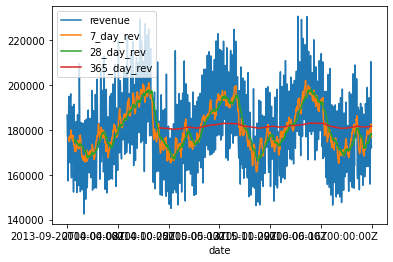

In [21]:
# Compute 7_day_rev
daily_revenue['7_day_rev'] = daily_revenue.revenue.rolling(window=7,center=False).mean()

# Compute 28_day_rev
daily_revenue['28_day_rev'] = daily_revenue.revenue.rolling(window=28,center=False).mean()
    
# Compute 365_day_rev
daily_revenue['365_day_rev'] = daily_revenue.revenue.rolling(window=365,center=False).mean()
    
# Plot date, and revenue, along with the 3 rolling functions (in order)    
daily_revenue[:1200].plot(x='date', y=['revenue', '7_day_rev', '28_day_rev', '365_day_rev', ])
plt.show()

Exponential rolling average & over/under smoothing

Note that the medium window strikes the right balance. Revenue seems to be growing in this product so it must not be the cause of the overall flat revenue trend!

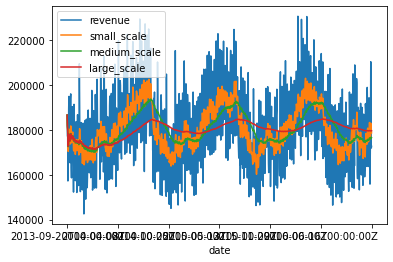

In [22]:
# Calculate 'small_scale'
daily_revenue['small_scale'] = daily_revenue.revenue.ewm(span=10).mean()

# Calculate 'medium_scale'
daily_revenue['medium_scale'] = daily_revenue.revenue.ewm(span=100).mean()

# Calculate 'large_scale'
daily_revenue['large_scale'] = daily_revenue.revenue.ewm(span=500).mean()

# Plot 'date' on the x-axis and, our three averages and 'revenue'
# on the y-axis
daily_revenue[:1200].plot(x = 'date', y =['revenue', 'small_scale', 'medium_scale', 'large_scale'])
plt.show()

Visualizing user spending

Recently, the Product team made some big changes to both the Android & iOS apps. They do not have any direct concerns about the impact of these changes, but want you to monitor the data to make sure that the changes don't hurt company revenue. Additionally, the product team believes that some of these changes may impact female users more than male users. 

From this view, it seems like our aggregate revenue is fairly stable, so the changes are most likely not hurting revenue.

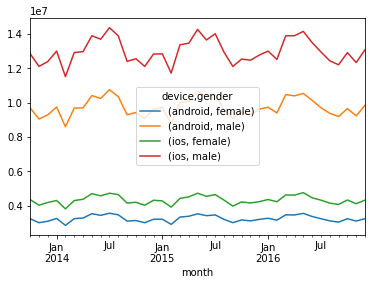

In [23]:
daily_revenue['month'] = daily_revenue['date'].str[:10].values.astype('datetime64[M]')
user_revenue = daily_revenue.groupby(['month', 'device', 'gender'], as_index=False)['revenue'].sum()

# Pivot user_revenue
pivoted_data = pd.pivot_table(user_revenue, values ='revenue', columns=['device', 'gender'], index='month')
pivoted_data = pivoted_data[1:(len(pivoted_data) -1 )]

# Create and show the plot
pivoted_data.plot()
plt.show()

# The Design and Application of A/B Testing

Overview
- Introduction to A/B testing
- How to design an experiment
- Understand the logic behind A/B testing
- Analyze the results of a test

A/B test: an experiment where you...
- Test two or more variants against each other
- to evaluate which one performs "best",
- in the context of a randomized experiment

Control and treatment groups
- Testing two or more ideas against each other:
- Control: The current state of your product
- Treatment(s): The variant(s) that you want
to test

A/B Test - improving our app paywall
- Question: Which paywall has a higher conversion
rate?
  - Current Paywall: "I hope you enjoyed your
free-trial, please consider subscribing" (control)
  - Proposed Paywall: “Your free-trial has ended,
don’t miss out, subscribe today!” (treatment)

A/B testing process
- Randomly subset the users and show one set
the control and one the treatment
- Monitor the conversion rates of each group to
see which is better

The importance of randomness
- Random assignment helps to...
  - isolate the impact of the change made
  - reduce the potential impact of confounding variables
- Using an assignment criteria may introduce confounders

A/B testing fiexibility
- A/B testing can be use to...
  - improve sales within a mobile application
  - increase user interactions with a website
  - identify the impact of a medical treatment
  - optimize an assembly lines efficiency
  - and many more amazing things!
  - A/B tests leverage the power of randomness to identify causal 
  - A/B tests can provide statistical summaries such as confidence 
  - A/B testing can be applied to more than two groups generally.

A/B test generalizability

good

- Using a hash of the randomly assigned user id to determine user groupings.

bad

- Assigning users to the Test or Variant group based on their signup year.
- Randomly assigning users within one country to different groups.
- Allowing users to change groups every time they use the service or software.

Good problems for A/B testing
- Users are impacted individually
- Testing changes that can directly impact their behavior
- Determining whether changing the song recommendation algorithm for a music service increases user engagement

Bad problems for A/B testing
- Cases with network effects among users
  - Challenging to segment the users into groups
  - Difficult to untangle the impact of the test
  - Measuring the impact of a matching engine on user connections for a social network.
- Uncovering the impact of a code refactor on product stability.
- Determining the long term impact of a product design change on user retention.

Increasing our app's revenue with A/B testing
- Specific Goals:
  - Test change to our consumable purchase paywall to...
  - Increase revenue by increasing the purchase rate
- General Concepts:
  - A/B testing techniques transfer across a variety of contexts
  - Keep in mind how you would apply these techniques

Response variable
- The quantity used to measure the impact of your change
- Should either be a KPI or directly related to a KPI
- The easier to measure the better

Factors & variants
- Factors: The type of variable you are changing
  - The paywall color
- Variants: Particular changes you are testing
  - A red versus blue paywall

Experimental unit of our test
- The smallest unit you are measuring the change over
- Individual users make a convenient experimental unit

Experimental unit of our test
- User-days: User interactions on a given day
  - More convenient than users by itself
  - Not required to track user's actions across time
  - Can treat simpler actions as responses to the test

Randomness of experimental units
- Best to randomize by individuals regardless of our experimental unit
- Otherwise users can have inconsistent experience
- This can impact the tests results

Designing your A/B test
- Good to understand the qualities of your metrics and experimental units
- Important to build intuition about your users and data overall

Experimental units: Revenue per user day

A paywall is a feature of a website or other technology that requires payment from users in order to access additional content or services.

In [24]:
# load purchase_data
purchase_data = pd.read_csv('https://assets.datacamp.com/production/repositories/1646/datasets/5decd183ef3710475958bbc903160fd6354379d5/purchase_data_v1.csv')
# print the head of purchase_data
print(purchase_data.head())

         date       uid            sku  price
0  2017-07-10  41195147  sku_three_499    499
1  2017-07-15  41195147  sku_three_499    499
2  2017-11-12  41195147   sku_four_599    599
3  2017-09-26  91591874    sku_two_299    299
4  2017-12-01  91591874   sku_four_599    599


In [25]:
# Extract the 'day'; value from the timestamp
purchase_data.date = pd.to_datetime(purchase_data.date).dt.floor('d')

# Replace the NaN price values with 0 
purchase_data.price = np.where(np.isnan(purchase_data.price), 0, purchase_data.price)

# Aggregate the data by 'uid' & 'date'
purchase_data_agg = purchase_data.groupby(by=['uid', 'date'], as_index=False)
revenue_user_day = purchase_data_agg.sum()

# Calculate the final average
revenue_user_day = revenue_user_day.price.mean()
print(revenue_user_day)

407.95033407572384


A/B testing example - paywall variants
- Paywall Text: Test & Control
  - Current Paywall: "I hope you are enjoying the relaxing benefits of our app. Consider making a purchase."
  - Proposed Paywall Don’t miss out! Try one of our new products!
- Questions
  - Will updating the paywall text impact our revenue?
  - How do our three different consumable prices impact this?

Considerations in test design
1. Can our test be run well in practice?
2. Will we be able to derive meaningful results
from it?

Test sensitivity
- First question: What size of impact is meaningful to detect
  - 1%...?
  - 20%...?
- Smaller changes = more difficult to detect
  - can be hidden by randomness
- Sensitivity: The minimum level of change we want to be able to detect in our test
  - Evaluate different sensitivity values

Data variability
- Important to understand the variability in your
data
- Does the amount spent vary a lot among users?
  - If it does not then it will be easier to detect a
change

Choosing experimental unit & response variable
- Primary Goal: Increase revenue
- Better Metric: Paywall view to purchase conversion rate
  - more granular than overall revenue
  - directly related to the our test
- Experimental Unit: Paywall views
  - simplest to work with
  - assuming these interactions are independent

Finding our baseline conversion rate
- Baseline conversion rate: Conversion rate before we run the test

In [26]:
# load demographics_data
purchase_data = pd.read_csv('https://assets.datacamp.com/production/repositories/1646/datasets/2751adce60684a03d8b4132adeadab8a0b95ee56/AB_testing_exercise.csv')
# print the head of demographics_data
print(purchase_data.head())

        uid country gender  spent  purchases        date  group device
0  11115722     MEX      F   1595          5  2016-03-08  GRP B      I
1  11122053     USA      M    498          2  2017-07-14  GRP B      I
2  11128688     USA      F   2394          6  2017-09-17  GRP A      I
3  11130578     USA      F   1197          3  2017-11-30  GRP A      I
4  11130759     ESP      M   1297          3  2018-01-10  GRP B      A


In [27]:
purchase_data

,uid,country,gender,spent,purchases,date,group,device
0,11115722,MEX,F,1595,5,2016-03-08,GRP B,I
1,11122053,USA,M,498,2,2017-07-14,GRP B,I
2,11128688,USA,F,2394,6,2017-09-17,GRP A,I
3,11130578,USA,F,1197,3,2017-11-30,GRP A,I
4,11130759,ESP,M,1297,3,2018-01-10,GRP B,A
...,...,...,...,...,...,...,...,...
45878,99994149,DEU,F,1897,3,2017-02-05,GRP B,I
45879,99995092,USA,F,899,1,2017-08-18,GRP B,A
45880,99996986,BRA,M,2194,6,2014-12-06,GRP B,A
45881,99997035,USA,M,2196,4,2017-04-05,GRP A,I


In [28]:
# Merge and group the datasets
# purchase_data = demographics_data.merge(paywall_views,  how='inner', on=['uid'])
# purchase_data.date = purchase_data.date.dt.floor('d')

# Group and aggregate our combined dataset 
daily_purchase_data = purchase_data.groupby(by=['date'], as_index=False)
daily_purchase_data = daily_purchase_data.agg({'purchases': ['sum', 'count']})

# Find the mean of each field and then multiply by 1000 to scale the result
daily_purchases = daily_purchase_data.purchases['sum'].mean()
daily_paywall_views = daily_purchase_data.purchases['count'].mean()
# daily_purchases = daily_purchases * 1000
daily_paywall_views = daily_paywall_views * 1000

print(daily_purchases)
print(daily_paywall_views)

158.44224924012158
34865.50151975684


Sensitivity

In [29]:
small_sensitivity = 0.1 
conversion_rate = 0.03468
# Find the conversion rate when increased by the percentage of the sensitivity above
small_conversion_rate = conversion_rate * (1 + small_sensitivity) 

# Apply the new conversion rate to find how many more users per day that translates to
small_purchasers = daily_paywall_views * small_conversion_rate

# Subtract the initial daily_purcahsers number from this new value to see the lift
purchaser_lift = small_purchasers - daily_purchases

print(small_conversion_rate)
print(small_purchasers)
print(purchaser_lift)

0.03814800000000001
1330.0491519756843
1171.6069027355627


Standard error

Notice how closely the standard error is related to our sample size?

In [30]:
# Find the number of paywall views 
n = purchase_data.purchases.count()

# Calculate the quantitiy "v"
v = conversion_rate * (1 - conversion_rate) 

# Calculate the variance and standard error of the estimate
var = v / n 
se = var**0.5

print(var)
print(se)

7.296231196739534e-07
0.0008541797935294146


Null hypothesis
- Hypothesis that control & treatment have the same impact on the response
  - Updated paywall does not improve conversion rate
  - Any observed difference is due to randomness
- Rejecting the Null Hypothesis
  - Determine their is a difference between the treatment and control
  - Statistically significant result

Types of error & confidence level
- Confidence Level: Probability of not making
Type 1 Error
- Higher this value, larger test sample needed
- Common values: 0.90 & 0.95

![](https://i.imgur.com/g4Oy8Uj.png)

Statistical power
- Statistical Power: Probability of finding a statistically significant result when the Null Hypothesis is
false

Connecting the Different Components
- Estimate our needed sample size from:
  - needed level of sensitivity
  - our desired test power & confidence level

![](https://i.imgur.com/EvfAESC.png)

Power formula
- Sample size increases = Power increases
- Confidence level increases = Power decreases

With these particular values it looks like decreasing our confidence level has a slightly larger impact on the power than increasing our sample size

In [31]:
from scipy import stats

def get_power(n, p1, p2, cl):
    alpha = 1 - cl
    
    qu = stats.norm.ppf(1 - alpha/2)
    
    diff = abs(p2 - p1)
    bp = (p1 + p2) / 2
    
    v1 = p1 * (1 - p1)
    v2 = p2 * (1 - p2)
    
    bv = bp * (1 - bp)
    
    power_part_one = stats.norm.cdf((n**0.5 * diff - qu * (2 * bv)**0.5)/ (v1 + v2)**0.5)
    power_part_two = 1 - stats.norm.cdf((n**0.5 * diff + qu * (2 * bv)**0.5)/ (v1 + v2)**0.5)
    
    power = power_part_one + power_part_two
    return(power)

In [32]:
p1 = 0.1
p2 = 0.12
cl = 0.95
n1 = 1000

# Look at the impact of sample size increase on power
n_param_one = get_power(n=1000, p1=p1, p2=p2, cl=cl)
n_param_two = get_power(n=2000, p1=p1, p2=p2, cl=cl)
# Look at the impact of confidence level increase on power
alpha_param_one = get_power(n=n1, p1=p1, p2=p2, cl=0.8)
alpha_param_two = get_power(n=n1, p1=p1, p2=p2, cl=0.95)
    
# Compare the ratios
print(n_param_two / n_param_one)
print(alpha_param_one / alpha_param_two)

1.7596440001351992
1.8857367092232278


Calculating our needed sample size
- Baseline Conversion Rate: 0.03468 (calculated previously)
- Confidence Level: 0.95 (chosen by us)
- Desired Power: 0.80 (chosen by us)
- Sensitivity: 0.1 (chosen by us)

Generality of this function
- Function shown specific to conversion rate calculations
- Different response variables have different but analogous formulas

Decreasing the needed sample size
- Choose a unit of observation with lower variability
- Excluding users irrelevant to the process/change
- Think through how different factors relate to the sample size

In [33]:
# power and confidence level
def get_sample_size(power, p1, p2, cl, max_n=1000000):
    n = 1 
    while n <= max_n:
        tmp_power = get_power(n, p1, p2, cl)

        if tmp_power >= power: 
            return n 
        else: 
            n = n + 100

    return "Increase Max N Value"

In [34]:
# Merge the demographics and purchase data to only include paywall views
# purchase_data = demographics_data.merge(paywall_views, how='inner', on=['uid'])
                            
# Find the conversion rate
conversion_rate = (sum(purchase_data.purchases) / purchase_data.purchases.count()) / 100
            
print(conversion_rate)

         
# Desired Power: 0.8
# CL: 0.90
# Percent Lift: 0.1
p2 = conversion_rate * (1 + 0.1)
sample_size = get_sample_size(0.8, conversion_rate, p2, 0.90)
print(sample_size)

# Desired Power: 0.95
# CL 0.90
# Percent Lift: 0.1
p2 = conversion_rate * (1 + 0.1)
sample_size = get_sample_size(0.95, conversion_rate, p2, 0.9)
print(sample_size)

0.0454438463047316
27301
47701


#  Analyzing A/B Testing Results

Analyzing A/B test results
- How to analyze an A/B test
- Further topics in A/B testing

Evaluating our paywall test
- So far: Run our test for the specified amount of
time
- Next: Compare the two groups' purchase rates

Confirming our test results
- Crucial to validate your test data
  - Does the data look reasonable?
  - Ensure you have a random sample

Is the result statistically significant?
- Statistical Significance: Are the conversion rates different enough?
  - If yes then we reject the null hypothesis
  - Conclude that the paywall's have different effects
  - If no then it may just be randomness

p-values
- probability if the Null Hypothesis is true...
- of observing a value as or more extreme...
- than the one we observed
- Low p-values
  - represent potentially signi?cant results
  - the observation is unlikely to have happened due to randomness

Interpreting p-values
- Controversial concept in some ways
- Typically: accept or reject hypothesis based on the p-value
- Below table shows the general rules of thumb:

Next steps
1. Confirm our results
2. Explore how to provide useful context for them

Confirming our test results

In [35]:
# load ab_test_results
ab_test_results = pd.read_csv('https://assets.datacamp.com/production/repositories/1646/datasets/2751adce60684a03d8b4132adeadab8a0b95ee56/AB_testing_exercise.csv')
# print the head of ab_test_results
print(ab_test_results.head())

        uid country gender  spent  purchases        date  group device
0  11115722     MEX      F   1595          5  2016-03-08  GRP B      I
1  11122053     USA      M    498          2  2017-07-14  GRP B      I
2  11128688     USA      F   2394          6  2017-09-17  GRP A      I
3  11130578     USA      F   1197          3  2017-11-30  GRP A      I
4  11130759     ESP      M   1297          3  2018-01-10  GRP B      A


In [36]:
# Find the unique users in each group 
results = ab_test_results.groupby('group').agg({'uid': pd.Series.nunique}) 

# Find the overall number of unique users using "len" and "unique"
unique_users = len(ab_test_results.uid.unique()) 

# Find the percentage in each group
results = results / unique_users * 100
print(results)

             uid
group           
GRP A  50.147113
GRP B  49.852887


In [37]:
# Find the unique users in each group, by device and gender
results = ab_test_results.groupby(by=['group', 'device', 'gender']).agg({'uid': pd.Series.nunique}) 

# Find the overall number of unique users using "len" and "unique"
unique_users = len(ab_test_results.uid.unique())

# Find the percentage in each group
results = results / unique_users * 100
print(results)

                           uid
group device gender           
GRP A A      F       12.239827
             M       12.795589
      I      F       12.542772
             M       12.568925
GRP B A      F       12.553669
             M       12.499183
      I      F       12.283417
             M       12.516618


Thinking critically about p-values

The p-value is the probability of observing a value as or more extreme than the one observed under the Null Hypothesis.

Revisiting statistical significance
- Distribution of expected difference between
control and test groups if the Null Hypothesis true
- Red line: The observed difference in conversion
rates from our test
- p-value: Probability of being as or more
extreme than the red line on either side of the
distribution

Calculating our p-value
- Observe a small p-value and statistically significant results
- Achieved lift is relatively large

What is a con?dence interval
- Range of values for our estimation rather than single number
- Provides context for our estimation process
- Series of repeated experiments...
  - the calculated intervals will contain the true parameter X% of the time
- The true conversion rate is a fixed quantity, our estimation and the interval are variable

Confidence interval calculation
- Confidence Interval Formula
μ± Φ (α + (1-α)/2)× σ
- Estimated parameter (difference in conversion rates) follows Normal Distribution
- Can estimate the:
  - standard deviation ( σ ) and...
  - mean ( μ ) of this distribution
- α : Desired confidence interval width
- Bounds containing X% of the probability around the mean (e.g. 95%) of that distribution

Calculating confidence intervals
- test_conv : test group conversion rate
- con_conv : control group conversion rate
- test_size : test group observations
- con_size : control group observations

Next steps
- Adding context to our test results
- Communicating the data through visualizations

Intuition behind statistical significance

To recap we observed that a large lift makes us confident in our observed result, while a small sample size makes us less so, and ultimately high variance can lead to a high p-value!

In [38]:
def get_pvalue(con_conv, test_conv, con_size, test_size):  
    lift =  - abs(test_conv - con_conv)

    scale_one = con_conv * (1 - con_conv) * (1 / con_size)
    scale_two = test_conv * (1 - test_conv) * (1 / test_size)
    scale_val = (scale_one + scale_two)**0.5

    p_value = 2 * stats.norm.cdf(lift, loc = 0, scale = scale_val )

    return p_value

In [41]:
# Get the p-value
p_value = get_pvalue(con_conv=0.1, test_conv=0.17, con_size=1000, test_size=1000)
print(p_value)

# Get the p-value
p_value = get_pvalue(con_conv=0.1, test_conv=0.15, con_size=100, test_size=100)
print(p_value)

# Get the p-value
p_value = get_pvalue(con_conv=0.48, test_conv=0.5, con_size=1000, test_size=1000)
print(p_value)

4.131297741047306e-06
0.28366948940702086
0.370901935824383


Checking for statistical significance

It looks like our result is significant. Now we can continue on to provide confidence intervals.

In [42]:
cont_conv = 0.09096495570387314
test_conv = 0.1020053238686779
cont_size = 5329
test_size = 5748

# Compute the p-value
p_value = get_pvalue(con_conv=cont_conv, test_conv=test_conv, con_size=cont_size, test_size=test_size)
print(p_value)

# Check for statistical significance
if p_value >= 0.05:
    print("Not Significant")
else:
    print("Significant Result")

0.04900185792087508
Significant Result


Understanding confidence intervals

As our standard deviation decreases so too does the width of our confidence interval.

In [47]:
def get_ci(value, cl, sd):
  loc = stats.norm.ppf(1 - cl/2)
  rng_val = stats.norm.cdf(loc - value/sd)

  lwr_bnd = value - rng_val
  upr_bnd = value + rng_val 

  return_val = (lwr_bnd, upr_bnd)
  return(return_val)

In [49]:
# Compute and print the confidence interval
confidence_interval  = get_ci(1, 0.975, 0.5)
print(confidence_interval)

# Compute and print the confidence interval
confidence_interval  = get_ci(1, 0.95, 2)
print(confidence_interval)

# Compute and print the confidence interval
confidence_interval  = get_ci(1, 0.95, 0.001)
print(confidence_interval)

(0.9755040421682947, 1.0244959578317054)
(0.6690506448818785, 1.3309493551181215)
(1.0, 1.0)


Calculating confidence intervals

Notice that our interval is very narrow thanks to our substantial lift and large sample size.

In [51]:
test_conv = 0.102005
cont_conv = 0.090965
test_size = 56350
cont_size = 58583

# Calculate the mean of our lift distribution 
lift_mean = test_conv - cont_conv 

# Calculate variance and standard deviation 
lift_variance = (1 - test_conv) * test_conv /test_size + (1 - cont_conv) * cont_conv / cont_size
lift_sd = lift_variance**0.5

# Find the confidence intervals with cl = 0.95
confidence_interval = get_ci(lift_mean, 0.95, lift_sd)
print(confidence_interval)

(0.011039999822042502, 0.011040000177957487)


Factors to communicate

![](https://i.imgur.com/b1SBtJV.png)

Visualizing your results
- Histogram: Bucketed counts of observations
across values
- Histogram of centered and scaled conversion
rates for users
  - (conv_rate - mean) / sd

Plotting the difference of conversion rates
- The difference of Normal Distributions is a Normal Distribution
  - Mean: Difference of the means
  - Variance: Sum of the variances

Plotting the distribution

We see no overlap, which intuitively implies that our test and control conversion rates are significantly distinct.

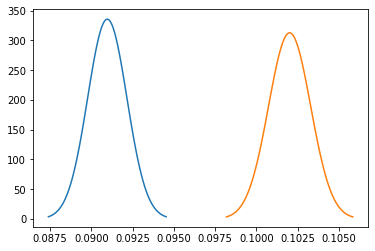

In [55]:
cont_var = 1.411507925080655e-06
test_var = 1.6255542142857143e-06

# Compute the standard deviations
control_sd = cont_var**0.5
test_sd = test_var**0.5

# Create the range of x values 
control_line = np.linspace( cont_conv - 3 * control_sd, cont_conv + 3 * control_sd , 100)
test_line = np.linspace( test_conv - 3 * test_sd,  test_conv + 3 * test_sd , 100)

# Plot the distribution 
plt.plot(control_line, stats.norm.pdf(control_line, cont_conv, control_sd))
plt.plot(test_line, stats.norm.pdf(test_line,test_conv, test_sd))
plt.show()

Plotting the difference distribution

This really contextualizes the lift we observed and provides more information than reporting the numerical point estimate alone would.

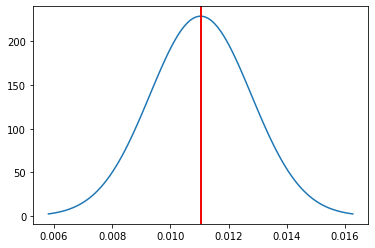

In [58]:
lwr_ci = 0.01103999822042502
upr_ci = 0.011040000177957487

# Find the lift mean and standard deviation
lift_mean = test_conv - cont_conv
lift_sd = (test_var + cont_var) ** 0.5

# Generate the range of x-values
lift_line = np.linspace(lift_mean - 3 * lift_sd, lift_mean + 3 * lift_sd, 100)

# Plot the lift distribution
plt.plot(lift_line, stats.norm.pdf(lift_line, lift_mean, lift_sd))

# Add the annotation lines
plt.axvline(x = lift_mean, color = 'green')
plt.axvline(x = lwr_ci, color = 'red')
plt.axvline(x = upr_ci, color = 'red')
plt.show()